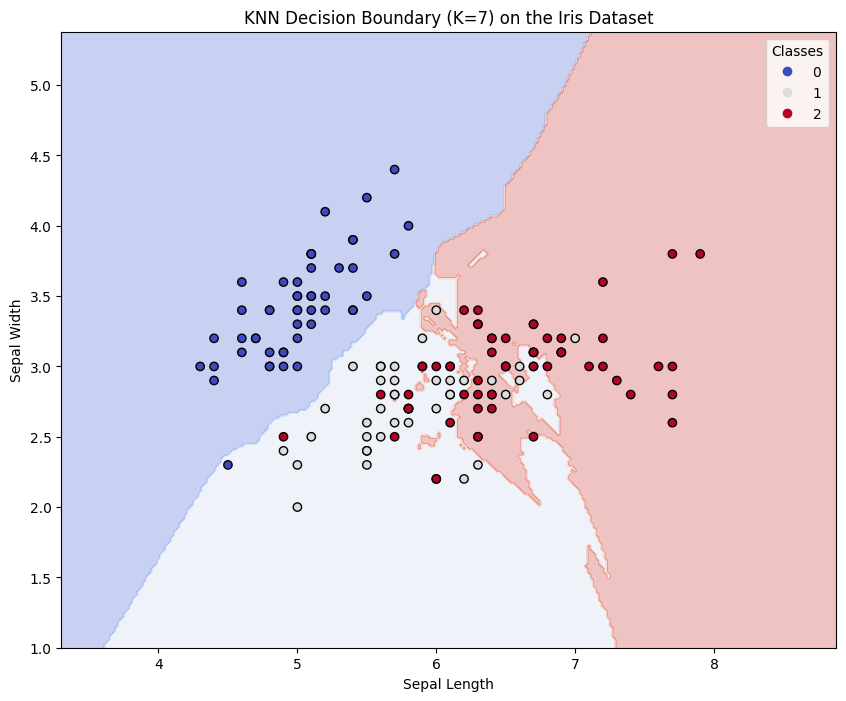

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

# Load the Iris dataset and use only the first two features (sepal length and width)
iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

# Train a KNN classifier with K = 7
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X, y)

# Create a mesh grid covering the feature space
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predict the class for each point in the grid
Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary and the data points
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap=plt.cm.coolwarm)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title('KNN Decision Boundary (K=7) on the Iris Dataset')
plt.legend(*scatter.legend_elements(), title="Classes")
plt.show()